<a href="https://colab.research.google.com/github/RonnyGuevara/Digital-image-processing/blob/main/TP4/Pr%C3%A1ctica_4_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 4:  Histograma de Luminancias

##Presentado por: Ronny Guevara

## Objetivo General
Representación de la luminancia de una imagen mediante el histograma
## Objetivos Específicos
*   Conocer las librerías imageio, numpy y matplotlib.pyplot 
*   Conversión de espacios RGB y YIQ 
*   Presentación de resultados de las operaciones aritméticas

## Descripción del práctico:
Las actividades son:

*   Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). Mostrar el histograma respectivo para 5 valores de contadores diferentes.
*   Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.
*   Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.


In [57]:
import imageio as io
import numpy as np
import os
import matplotlib.pyplot as plt

In [58]:
#Función que permite leer una imagen sin limitación de UNIT8
def get_image(dir):
  image = io.imread(dir)
  image = image.astype(np.int)
  return image

#Función que permite plotear la imagen
def plot2_image(image,Imagen, cmap=None):
  plt.figure(figsize=(100,100)) 
  plt.figure()
  plt.title(Imagen)
  plt.imshow(image,cmap=cmap)
  plt.colorbar()
  plt.grid(False)
  plt.show()

#Copia de la imagen Original
def image_copy(image):
  work_image=np.copy(image)
  return work_image 

#Información de la imagen
def image_info(image):
  print('This image is', image.dtype)
  print('with dimensions', image.shape)

#Normalización de las imágenes
def image_norm(image):
  norm=image.astype(np.float64)/255
  return norm

#Conversión RGB2YIQ
def image_RGB2YIQ(image):
  matrixYIQ=np.array([[0.299,0.587,0.144],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
  YIQ=np.dot(image,matrixYIQ)
  y = YIQ[:,:,0]
  i = YIQ[:,:,1]
  q = YIQ[:,:,2]
  y = np.clip(y, 0 ,1)
  q = np.clip(q,-0.5957 , 0.5957 )
  i = np.clip(i, -0.5226 , 0.5226) 
  return y, i, q
  
#Conversión YIQ2RGB
def image_YIQ2RGB(y, i, q):
  Shape = y.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = y
  im_out[:,:,1] = i
  im_out[:,:,2] = q 
  matrixRGB=np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
  RGB=np.dot(im_out,matrixRGB)
  RGB=RGB.clip(0,1)*255
  RGB=RGB.astype(np.uint8)
  return RGB


In [59]:
#Función que permite corregir la luminancia de la imagen mediante una constante
def correction_y(image, const):
  y, i, q = image_RGB2YIQ(image)
  y= np.clip((y*const), 0 , 1)
  return y, i, q

#Filtro potencia cuadrática
def correction_y_squre(image):
  y, i, q = image_RGB2YIQ(image)
  y= np.clip(np.square(y), 0 ,1)
  return y, i, q

#Filtro raíz cuadrada
def correction_y_root(image):
  y, i, q = image_RGB2YIQ(image)
  y= np.clip(np.sqrt(y), 0 ,1)
  return y, i, q 

def correction_y_lineal(image, Ymin, Ymax ):
  y, i, q = image_RGB2YIQ(image)
  y= np.clip(((y-Ymax)/(Ymin-Ymax)), 0 , 1)

  return y, i, q


In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 7200x7200 with 0 Axes>

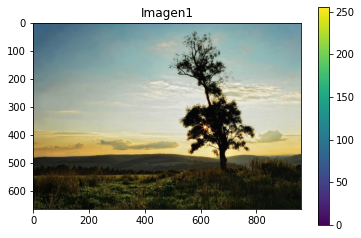

In [61]:
#@title Selecciona la imagen { run: "auto" }
Imagen1='/content/drive/MyDrive/Colab Notebooks/Foto1.jpg'
Imagen2='/content/drive/MyDrive/Colab Notebooks/Foto2.jpg'
Imagen3='/content/drive/MyDrive/Colab Notebooks/Foto4.jpg'
Imagen4='/content/drive/MyDrive/Colab Notebooks/loro.jpg'
Imagen = 'Imagen1' #@param ["Imagen1", "Imagen2", "Imagen3","Imagen4" ]

if Imagen == 'Imagen1':
  image = get_image(Imagen1)
  plot2_image(image, 'Imagen1')
elif Imagen == 'Imagen2':
  image = get_image(Imagen2)
  plot2_image(image, 'Imagen2')
elif Imagen == 'Imagen3':
  image = get_image(Imagen3)
  plot2_image(image, 'Imagen3')
elif Imagen == 'Imagen4':
  image = get_image(Imagen4)
  plot2_image(image, 'Imagen4')

In [62]:
#Proceso de copia de la imagen y visualización de información
work_image=image_copy(image)
image_info(work_image)

This image is int64
with dimensions (667, 960, 3)


<Figure size 7200x7200 with 0 Axes>

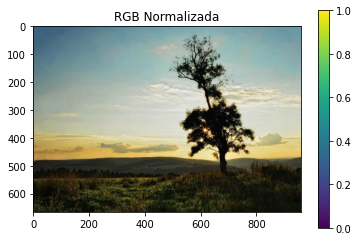

<Figure size 7200x7200 with 0 Axes>

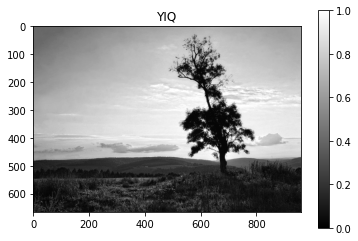

In [63]:
#Normalización de la imagen y conversión del espacio RGB a YIQ
work_image=image_norm(work_image)
plot2_image(work_image,'RGB Normalizada',cmap=None)
y, i, q = image_RGB2YIQ(work_image)
plot2_image(y,'YIQ',cmap='gray')


####Creación de la función histograma (histogram_y)
Un histograma es la representación gráfica en forma de barras, que simboliza la distribución de un conjunto de datos. El histograma muestra la distribución o tendencia, la variabilidad o dispersión y la forma de la distribución. Los datos se agrupan en intervalos de igual tamaño, llamado clases (Bins).

In [64]:
#Función histograma: Es importante definir el conjunto de datos, la cantidad de contenedores (bins) y el limite del eje X 
def histogram_y(y: np.array, nbins, lmax = 1, lmin=0):
  bin_wth = (np.float64(lmax) - np.float64(lmin)) / np.float64(nbins) #Calculo del ancho de cada contenedor
  bin_str = np.linspace(lmin, lmax-bin_wth, num=nbins) 
  bin_end = bin_str + bin_wth
  hist = np.empty_like(bin_str) #Devuelve una nueva matriz con la misma forma y tipo de la matriz origen
  for date,bin in enumerate(hist):
    in_bin = np.logical_and(y >= bin_str[date], y < bin_end[date]) #Operación lógica que determina si el dato debe ingresar al contenedor
    hist[date] = in_bin.sum()
  last = y == bin_end[-1]
  hist[-1] += last.sum()

  return hist, bin_str


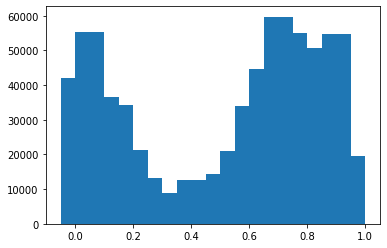

In [65]:
#@title Seleccione el número de clases { run: "auto" }
Bins = 20 #@param {type:"slider", min:10, max:50, step:10}

hist, bins=histogram_y(y, Bins)
plt.bar(bins,hist, width=0.1)
plt.show()

#### Visualizaciones individuales

In [66]:
#@title Seleccione la constante a multiplicar { run: "auto" }
Y = 0.5 #@param {type:"slider", min:0, max:3, step:0.1}


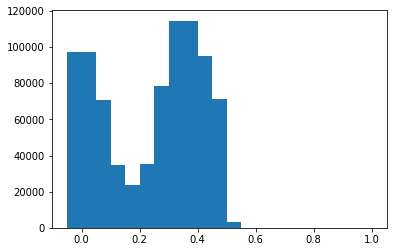

<Figure size 7200x7200 with 0 Axes>

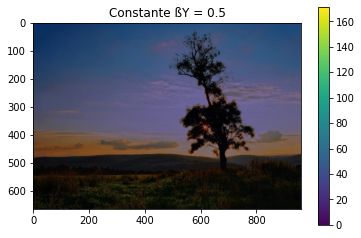

In [67]:
#Corrección de la luminancia mediante una constante
y, i, q = correction_y(work_image, Y)
hist, bins = histogram_y(y, Bins)
plt.bar(bins,hist, width=0.1)
image = image_YIQ2RGB(y, i, q)
plot2_image(image, f"Constante ßY = {str(Y)}")

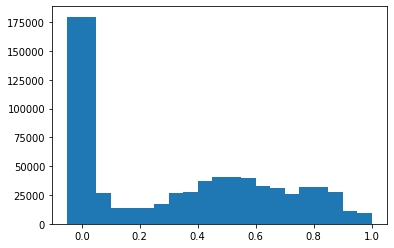

<Figure size 7200x7200 with 0 Axes>

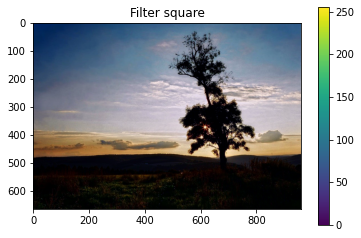

In [68]:
#Filtro potencia cuadrática
y, i, q=correction_y_squre(work_image)
hist, bins=histogram_y(y, Bins)
plt.bar(bins,hist, width=0.1)
image = image_YIQ2RGB(y, i, q)
plot2_image(image,'Filter square')

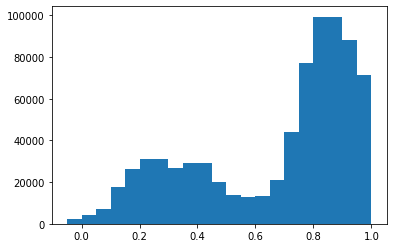

<Figure size 7200x7200 with 0 Axes>

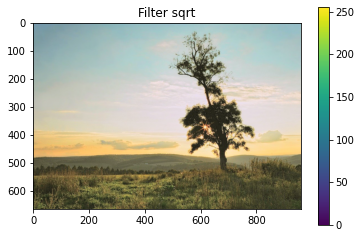

In [69]:
#Filtro raíz cuadrada
y, i, q=correction_y_root(work_image)
hist, bins=histogram_y(y, Bins)
plt.bar(bins,hist, width=0.1)
image = image_YIQ2RGB(y, i, q)
plot2_image(image,'Filter sqrt')

In [70]:
#@title Selección el umbral a trabajar { run: "auto" }
Ymin= 0 #@param {type:"slider", min:0, max:1, step:0.1}
Ymax = 0.8 #@param {type:"slider", min:0, max:1, step:0.1}

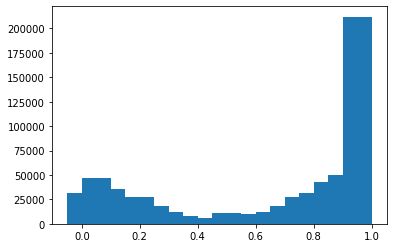

<Figure size 7200x7200 with 0 Axes>

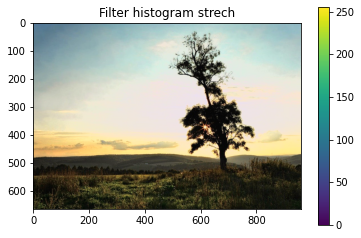

In [71]:
#Filtro lineal a trozos (histogram strech)
y, i, q=correction_y_lineal(work_image, Ymax, Ymin)
hist, bins=histogram_y(y, Bins)
plt.bar(bins,hist, width=0.1)
image = image_YIQ2RGB(y, i, q)
plot2_image(image,'Filter histogram strech')

##Resultados

####1. Histogramas
Se muestra el resultado de la función histogram_y que permite la visualización de los datos de la luminancia para los siguientes contenedores: (5 , 10 , 20 , 30 , 40 , 50 )

<BarContainer object of 50 artists>

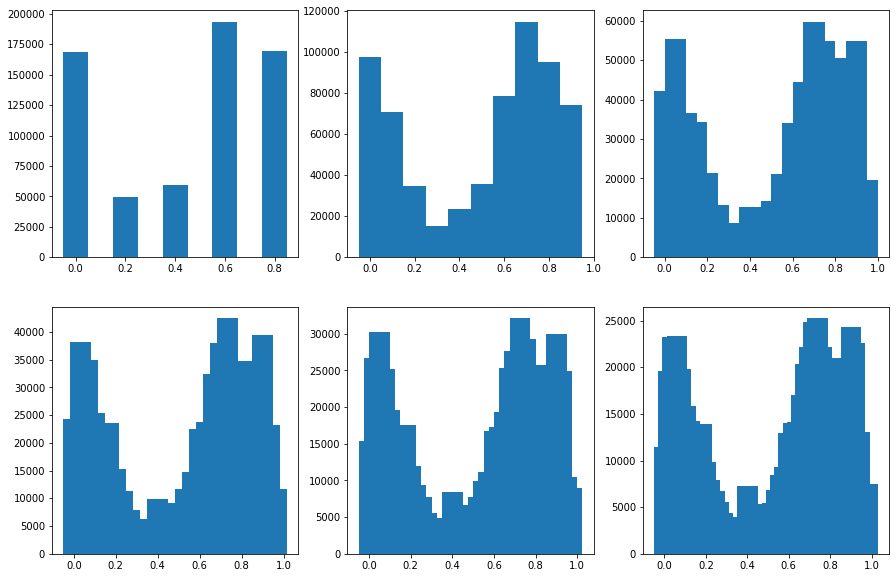

In [72]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15,10)
y, i, q = image_RGB2YIQ(work_image)
hist, bins=histogram_y(y, 5)
axes[0,0].bar(bins,hist, width=0.1)
hist, bins=histogram_y(y, 10)
axes[0,1].bar(bins,hist, width=0.1)
hist, bins=histogram_y(y, 20)
axes[0,2].bar(bins,hist, width=0.1)
hist, bins=histogram_y(y, 30)
axes[1,0].bar(bins,hist, width=0.1)
hist, bins=histogram_y(y, 40)
axes[1,1].bar(bins,hist, width=0.1)
hist, bins=histogram_y(y, 50)
axes[1,2].bar(bins,hist, width=0.1)

####2. Corrección de la luminancia mediante una constante Alfa
Se muestra el resultado de la corrección de la luminancia de la imagen para una constante Alfa selecciona por el usuario

<BarContainer object of 20 artists>

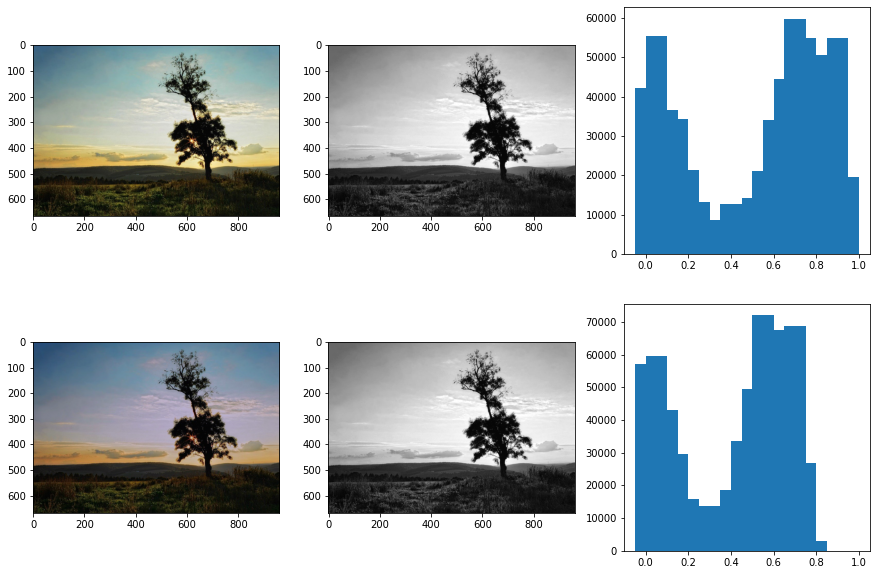

In [73]:
#@title Seleccione el número de clases y la constante a multiplicar { run: "auto" }
Bins1 = 20 #@param {type:"slider", min:10, max:50, step:10}
ØY = 0.8 #@param {type:"slider", min:0, max:3, step:0.1}
y2, i2, q2 = image_RGB2YIQ(work_image)
y, i, q=correction_y(work_image, ØY)
hist, bins=histogram_y(y, Bins1)
image = image_YIQ2RGB(y, i, q)
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15,10)
axes[0,0].imshow(work_image)
axes[0,1].imshow(y2, "gray" )
hist, bins = histogram_y(y2,Bins1)
axes[0,2].bar(bins,hist, width=0.1)
image=image_YIQ2RGB(y, i, q)
axes[1,0].imshow(image)
axes[1,1].imshow(y, "gray" )
hist, bins = histogram_y(y,Bins1)
axes[1,2].bar(bins,hist, width=0.1)


####3. Implementacón las funciones: raíz cuadrada, potencia cuadrática y Lineal a trozos
En este apartado el usuario selecciona el filtro que desee aplicar a la luminancia de la imagen

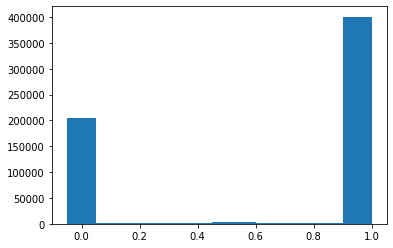

<Figure size 7200x7200 with 0 Axes>

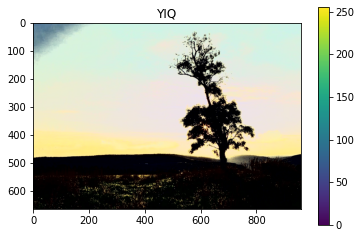

In [74]:
#@title Seleccione el filtro { run: "auto" }

Filter = 'Lineal' #@param ["Square", "Sqrt","Lineal"]
Ymin = 0.3 #@param {type:"slider", min:0, max:1, step:0.1} 
Ymax = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}

if Filter == 'Square':
  y, i, q=correction_y_squre(work_image)
  hist, bins=histogram_y(y, Bins)
  plt.bar(bins,hist, width=0.1)
  image = image_YIQ2RGB(y, i, q)
  plot2_image(image,'YIQ')
elif Filter == 'Sqrt':
  y, i, q=correction_y_root(work_image)
  hist, bins=histogram_y(y, Bins)
  plt.bar(bins,hist, width=0.1)
  image = image_YIQ2RGB(y, i, q)
  plot2_image(image,'YIQ')
elif Filter == 'Lineal':
  y, i, q=correction_y_lineal(work_image, Ymax, Ymin)
  hist, bins=histogram_y(y, Bins)
  plt.bar(bins,hist, width=0.1)
  image = image_YIQ2RGB(y, i, q)
  plot2_image(image,'YIQ')